# Introducción al aprendizaje automatizado - TP 0
## Autora: Aldana Zarate

Como los apartados a) y b) son idénticos solo que difieren en el centro de las distribuciones y sus desviaciones estándar, primero crearemos una función auxiliar que además de los parámetros pedidos tome adicionalmente los mencionados para luego usarla adecuadamente.


In [1]:
import pandas as pd
import numpy as np
import math

def generate_dataframe(center1, center2, std_dev, d, n):
    cov_matrix = np.diag([std_dev ** 2] * d)
    ndarray1 = np.random.multivariate_normal(center1, cov_matrix, size = n // 2)
    ndarray2 = np.random.multivariate_normal(center2, cov_matrix, size = math.ceil(n / 2))
    
    ndarray = np.concatenate((ndarray1, ndarray2))
    
    dataframe = pd.DataFrame(data = ndarray)
    
    dataframe['Clase'] = np.append([1] * (n // 2), [-1] * (math.ceil(n / 2)))
    return dataframe
    

### Apartado a)

In [2]:
def generate_dataframe_ej_a(d, n, c):
    return generate_dataframe([1] * d, [-1] * d, c * math.sqrt(d), d, n)


### Apartado b)

In [3]:
def generate_dataframe_ej_b(d, n, c):
    return generate_dataframe(np.append([1],[0] * (d-1)), np.append([-1], [0] * (d-1)), c, d, n)
    

### Verificación de los problemas a) y b)
Pasamos a generar dos dataframes de ejemplo y los graficamos para ver y analizar los datos resultantes.

<AxesSubplot:xlabel='0', ylabel='1'>

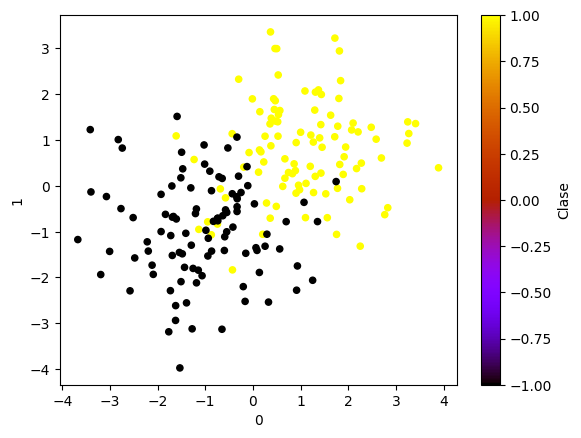

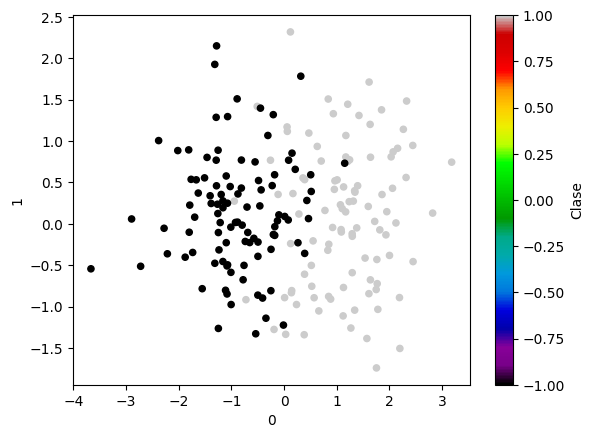

In [4]:
import matplotlib.pyplot as plt

df_a = generate_dataframe_ej_a(2, 200, 0.75)
df_b = generate_dataframe_ej_b(2, 200, 0.75)

df_a.plot(x=0, y=1, kind='scatter', c='Clase', colormap='gnuplot')
df_b.plot(x=0, y=1, kind='scatter', c='Clase', colormap='nipy_spectral')

## ////////// Conclusiones gráficos //////

Pasamos ahora a trabajar con un input de ejemplo más, y vamos a calcularle su media y desviación estándar resultante para comparar con la original y ver qué tan cerca estuvo.

In [5]:
df_a = generate_dataframe_ej_a(4, 5000, 2.00)
df_b = generate_dataframe_ej_b(4, 5000, 2.00)

print("Media para el dataframe del apartado a)")
df_am = df_a.groupby('Clase')
print(df_am.mean())
print("\nDesviación estandar para el dataframe del apartado a)")
print(df_am.std())

df_bm = df_b.groupby('Clase')
print("\nMedia para el dataframe del apartado b)")
print(df_bm.mean())
print("\nDesviación estandar para el dataframe del apartado b)")
print(df_bm.std())

Media para el dataframe del apartado a)
              0         1         2         3
Clase                                        
-1    -0.937740 -1.044277 -1.066326 -1.098873
 1     1.216023  0.988751  0.967150  0.913312

Desviación estandar para el dataframe del apartado a)
              0         1         2         3
Clase                                        
-1     3.991400  4.130326  3.995515  3.949818
 1     3.970775  3.982055  4.046197  4.058810

Media para el dataframe del apartado b)
              0         1         2         3
Clase                                        
-1    -1.023900  0.017610  0.018184 -0.004168
 1     1.002199  0.022014  0.045353  0.082908

Desviación estandar para el dataframe del apartado b)
              0         1         2         3
Clase                                        
-1     2.000851  1.981777  1.982795  2.000249
 1     2.042109  1.965823  1.971184  1.995383


Se observa un margen de error no mayor al 5\% con lo cual considero que la generación de datos fue adecuada. 

In [ ]:
### Apartado C